# A perfect world

### Introduction

In the last lesson, we discussed the different types of error that we see when we train our machine learning models: irreducible error, variance and bias.  Now the first two of these errors are due to randomness.  We'll explore these in turn.  

The way that we'll do this is by constructing our data in such a way that these errors do not exist.  We'll construct a perfect dataset.  Doing so will have two benefits:

1. The easiest way to appreciate and visualize our different errors is to see what a machine learning model looks like when they do not exist.
2. The ability to create artificial datasets is crucial to our ability to explore new techniques and algorithms

Let's get going.

### Imagining a world without error

Ok, so in this lesson, we'll create a dataset that our machine learning model can perfectly predict.  Then we'll train our model on this dataset.

Here's our scenario.

Imagine that we are hired by a restaurant to predict the number of customers who enter our restaurant each day.  The restaurant wants to reduce the amount it wastes on over purchasing food supplies, a lot of which it cannot use the next day.  It knows that temperature affects the number of customers it sees each day, but it doesn't know how much.

In other words, our model looks like the following:

$$ customers = \theta_1*temperature + \theta_0 $$

> Here we use the variable theta, $\theta$ to represent the parameter for temperature that we are trying top discover.  Previously, we have used $x_1$ or $m$ for this.  $\theta_1$ is equivalent to our coefficient variable and $\theta_0$ is equivalent to our intercept variable.

Now we don't have any data yet from the restaurant -- they haven't yet hired us -- so we need to create a mock dataset ourselves.

#### 1. Creating random numbers

We know that our inputs is going to be temperatures and our outputs will be customers.  So we can start off by creating our input data, a list of random temperatures between 30 degrees and 101 degrees.

In [1]:
from random import randint
random_temperatures = list(map(lambda num: randint(30,101), range(0, 50)))
random_temperatures[0:3]

[95, 49, 30]

Press shift + enter on the cell above multiple times.  

Notice that every time the cell is executed, a different set of numbers is generated.  This makes sense, but it can also be problematic.  We don't want this process to generate a list of random numbers that we cannot reproduce.  What if soemthing goes wrong?  We'll need the ability to recreate our data so that we can then carefully explore everything that went wrong.  

So we want the ability to generate the same list of random, really pseudo-random numbers, each time.  We do this by *seeding* our random number generator. 

Let's see how seeding works.

In [3]:
from random import randint
import random
random.seed(1)
randint(1, 10)

3

Seeding configures our random number generator to generate the same sequence of numbers.  Try re-executing the cell above, notice that the first random number is always 3.

So now let's use seeding to generate a list of 50 random numbers that will be the same list even if we re-execute the cell.

In [4]:
from random import randint
random.seed(1)
random_temperatures = list(map(lambda num: randint(30,101), range(0, 50)))
random_temperatures[0:3]

[47, 38, 62]

So the first three numbers will always be 47, 38, and 62.

### 2. Generate perfect outcomes

Ok, so now that we have generated a list of random temperatures, our inputs, it's time to generate our outcomes.  Remember we want to do this in a way that these outcomes have no randomness in them.  Also remember that our the restaurant believes that the true model follows the following form: 

$$ customers = \theta_1*temperature + \theta_0 $$

Let's assume that $theta_1 = 3$ and $theta_0 = 10$.  We then have the following model:

$$ customers = 3*temperature + 10 $$

And we should be able to construct a dataset that perfectly matches this model.  Here it is.

In [3]:
perfect_customers = list(map(lambda temp: 3*temp + 10, random_temperatures))
perfect_customers[0:3]

[295, 157, 100]

Ok, so let's plot our data.

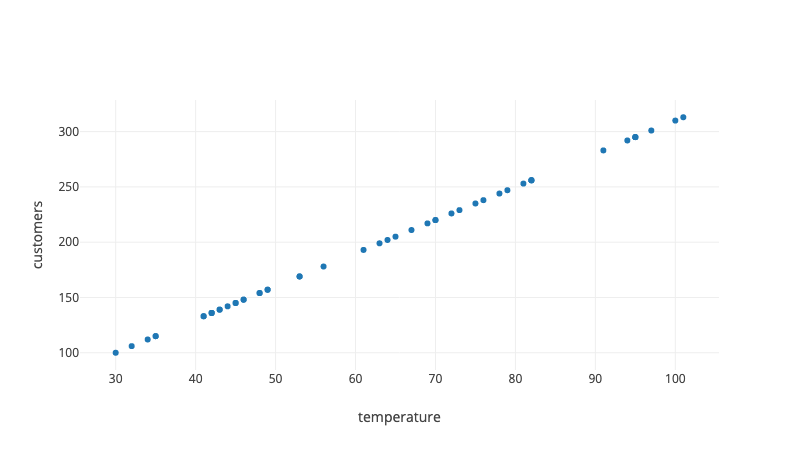

In [4]:
from graph import trace_values, plot
data_trace = trace_values(random_temperatures, perfect_customers, name = 'initial data')
layout = {'yaxis': {'title': 'customers'}, 'xaxis': {'title': 'temperature'}}
plot([data_trace], layout = layout)

Ok, so our restaurant observed the above beautiful data of temperatures and customers. 

### Training our linear model

Now so far we created a synthetic dataset.  And to create a perfect synthetic dataset, we started off with our true model, and then created our dataset from there.

But normally, we do not know the true underlying model.  Instead we use a machine learning algorithm to approximate it.  Let's imagine we did not know that our underlying model was $ customers = 3x + 10$ and see how good our regression model is approximating this underlying model.

1. Transform dataset into rows

SciKit learn takes feature variables in the form of a nested list.  So we wrap each of our temperatures in a list like so:

In [6]:
temperature_inputs = list(map(lambda temperature: [temperature], random_temperatures))

This takes our data from here:

In [9]:
random_temperatures[0:3]

[95, 49, 30]

To here:

In [7]:
temperature_inputs[0:3]

[[95], [49], [30]]

2. Fit the model to the data

Next we go through our standard steps of training our linear regression model, if the model can detect the underlying pattern in the data.

In [11]:
from sklearn.linear_model import LinearRegression
perfect_model = LinearRegression()
perfect_model.fit(temperature_inputs, perfect_customers)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

3. View the parameters

Let's see how well our model did.

In [10]:
perfect_model.coef_

array([3.])

In [11]:
perfect_model.intercept_

10.000000000000028

Hot damn! Our regression model started off not knowing the underlying true model, but by feeding it data, it was able to discover this model.  

We can confirm that this model matches the data well, by scoring the model against this data.

In [12]:
perfect_model.score(temperature_inputs, perfect_customers)

1.0

> What's that score? This score is the number related to the coefficient of determination, or $r^2$.  This number looks shows the proportion of the variance in the target variables that are explained by the model.  The highest this number can ever reach is 1, and a very low score is 0 (although it can become negative).    

Here we reached the highest score we can 1.0.  This makes sense -- we have various outcomes and each of them can perfectly be explained by our model.

### Releasing the model

Now that this model has been trained on our data, we can try the model on data it has not yet seen.  Because we are modeling a world  where we always have $customers =  3*temp + 10 $, and this what our model predicts, our model will predict the new number of customers perfectly.

In [12]:
new_random_temperatures = list(map(lambda num: randint(30,101), range(0, 50)))
new_perfect_customers = list(map(lambda temp: 3*temp + 10, new_random_temperatures))
new_random_temperatures[0:3]

[31, 56, 41]

In [13]:
input_new_temperatures = list(map(lambda temp: [temp], new_random_temperatures))
input_new_temperatures[0:3]

[[31], [56], [41]]

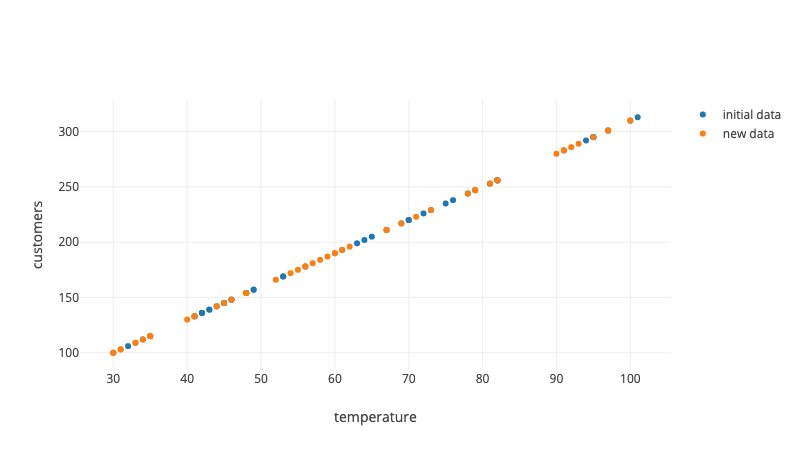

In [16]:
from graph import trace_values, plot
new_data_trace = trace_values(new_random_temperatures, new_perfect_customers, name = 'new data')
plot([data_trace, new_data_trace], layout = layout)

In [15]:
perfect_model.score(input_new_temperatures, new_perfect_customers)

1.0

### Summary

In this lesson, we saw a couple things.

First, we saw how to generate a dataset.  To do this, we first created a list of random inputs, our temperatures.  Then we created the corresponding outputs by simply creating outputs that were a function of our inputs.

The second thing we saw was what occurs when we train our model on a dataset that perfectly follows a linear equation.  What happens is our model can perfectly discover the underlying model.  We saw this when we trained our model on our dataset.  It perfectly discovered the parameters underlying the data,  $customers = 3xtemperature + 10$.  We also saw that saw tha our model also predicted data it had not previously seen, so long as the outputs also followed the underlying formula.

We'll use this perfect scenario by way of comparison to see what occurs when we do not have perfect data.